# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [5]:
# Preview the dataset
data.head(30)

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6
1924-01-01,47.6
1928-01-01,47.8
1932-01-01,46.2
1936-01-01,46.5


Plot this time series data. 

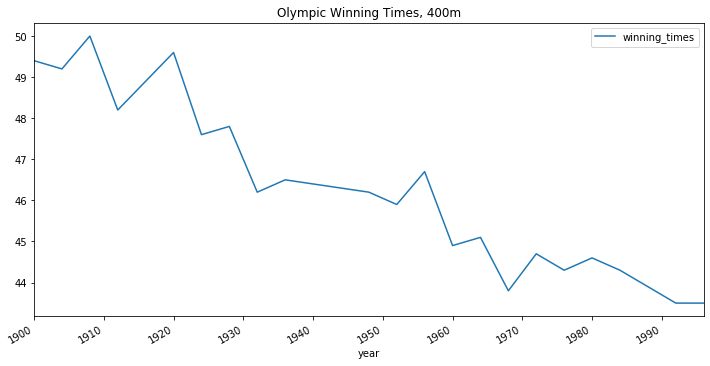

In [9]:
# Plot the time series
data.plot(figsize=(12,6))
plt.title("Olympic Winning Times, 400m")
plt.show()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

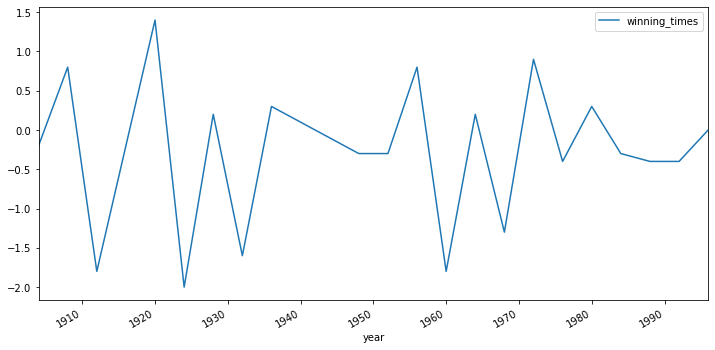

In [26]:
# Difference the time series
data_diff = data.diff(periods=1).dropna()
data_diff.plot(figsize=(12,6))

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

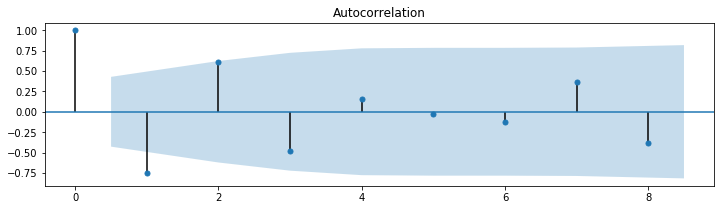

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(12,3))
plot_acf(data_diff,ax=ax, lags=8);

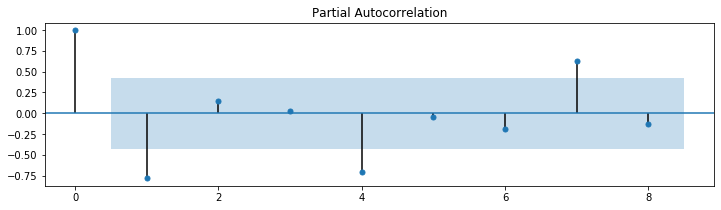

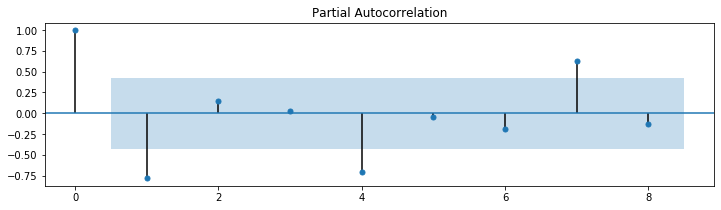

In [38]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,3
plot_pacf(data_diff, lags=8)

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

ACF shows a gradual trend, as does the PACF at 8 lags.  Accordingly, ARMA would be an appropriate model.  

In [39]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(data_diff, order=(1,0))     #order is for p,q
# Fit the model to data
res_arma = mod_arma.fit()
# Print out summary information on the fit
print(res_arma.summary())
# Print out the estimate for the constant and for theta
print(res_arma.params)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sun, 13 Sep 2020   AIC                             46.107
Time:                        22:55:45   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
# Instantiate an AR(1) model to the simulated data
mod_arma11 = ARMA(data_diff, order=(1,1))     #order is for p,q
# Fit the model to data
res_arma11 = mod_arma11.fit()
# Print out summary information on the fit
print(res_arma11.summary())
# Print out the estimate for the constant and for theta
print(res_arma11.params)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Sun, 13 Sep 2020   AIC                             47.916
Time:                        23:50:09   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [41]:
# Instantiate an AR(1) model to the simulated data
mod_arma20 = ARMA(data_diff, order=(2,0))     #order is for p,q
# Fit the model to data
res_arma20 = mod_arma20.fit()
# Print out summary information on the fit
print(res_arma20.summary())
# Print out the estimate for the constant and for theta
print(res_arma20.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 0)   Log Likelihood                 -19.931
Method:                       css-mle   S.D. of innovations              0.614
Date:                Sun, 13 Sep 2020   AIC                             47.863
Time:                        23:52:04   BIC                             52.041
Sample:                             0   HQIC                            48.770
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2835      0.090     -3.143      0.006      -0.460      -0.107
ar.L1.winning_times    -0.6307      0.223     -2.827      0.011      -1.068      -0.193
ar.L2.winning_ti

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


## What is your final model? Why did you pick this model?

I chose the AR model (ARMA 1,0) because shape of the ACF/PACF fit an AR-only (gradual/sig. drop) picture, and because the AIC was less desirable with two lags than with one.


## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 